# Direct Marketing Campaigns 

- the goal is to predict if the client will subscribe a term deposit

### Dataset Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 

Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
  Available at: 
  - [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
  - [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt


### Dataset description:

Input variables:
#### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
#### Related with the last contact of the current campaign:
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: 'yes','no')


### ML models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Support Vector Machine
4. Kernel SVM
5. Naive Bayes
6. Decision Tree Classification
7. Random Forest Classification
8. XGBoost
9. Artificial Neural Networks

## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('bank.csv')

## Exploratory Data Analysis

In [3]:
dataset.head(10)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
dataset.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  y           45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

### Balancing the Dataset

In [8]:
print("Deposit: NO", round(dataset['y'].value_counts()[0]/len(dataset) * 100, 2), "%")
print("Deposit: YES", round(dataset['y'].value_counts()[1]/len(dataset) * 100, 2), "%")

Deposit: NO 88.3 %
Deposit: YES 11.7 %


In [9]:
dataset.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
dataset = dataset.sample(frac=1, random_state=42)

deposit_yes = dataset.loc[dataset['y'] == "yes"]
deposit_no = dataset.loc[dataset['y'] == "no"][:5289]
balanced_dataset_new = pd.concat([deposit_yes, deposit_no])

balanced_dataset = balanced_dataset_new.sample(frac=1, random_state=42)

balanced_dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40429,40429,28,management,single,tertiary,no,492,no,no,cellular,2,jul,281,1,-1,0,unknown,no
17190,17190,27,technician,married,secondary,no,0,yes,no,cellular,28,jul,55,6,-1,0,unknown,no
15638,15638,35,technician,divorced,secondary,no,103,yes,no,cellular,21,jul,304,1,-1,0,unknown,no
35512,35512,31,unemployed,single,tertiary,no,140,yes,no,telephone,7,may,11,2,-1,0,unknown,no
9532,9532,45,services,married,secondary,no,191,no,yes,unknown,6,jun,136,2,-1,0,unknown,no


In [11]:
balanced_dataset.y.value_counts()

yes    5289
no     5289
Name: y, dtype: int64

In [12]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'poutcome']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Categorical Columns

In [13]:
# Function for drawing categorical columns in Seaborn. Need to pass dimension (size_x and size_y), column name, and title.
def categorical_columns_countplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    sns.countplot(x = column, data = balanced_dataset)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)
    
    sns.despine()

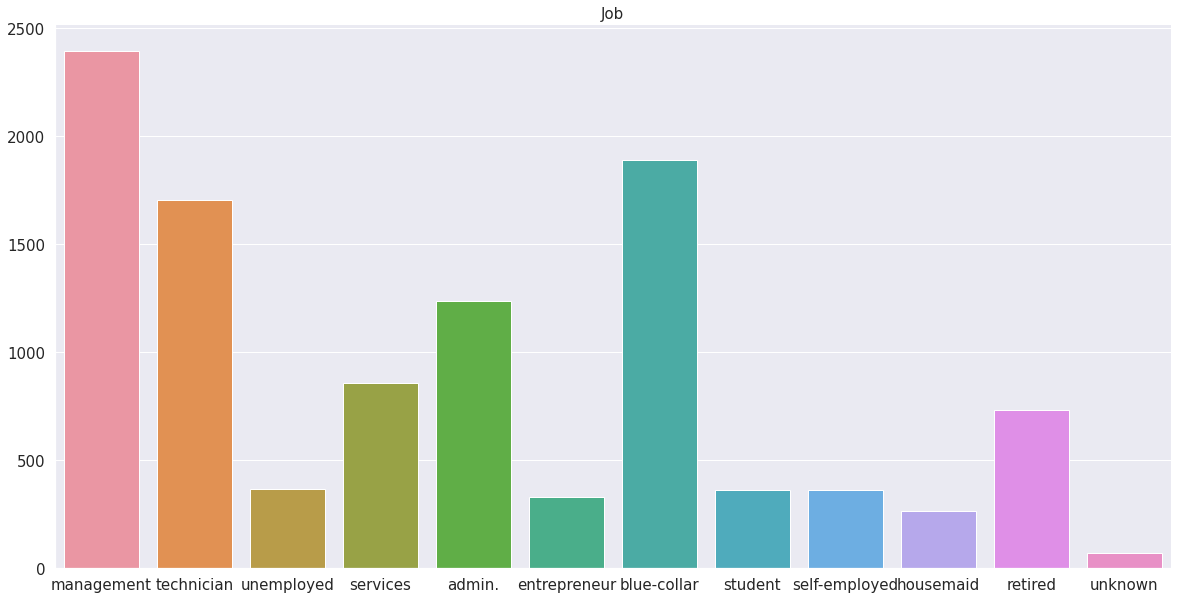

In [14]:
categorical_columns_countplot(20, 10, categorical_columns[0], "Job")

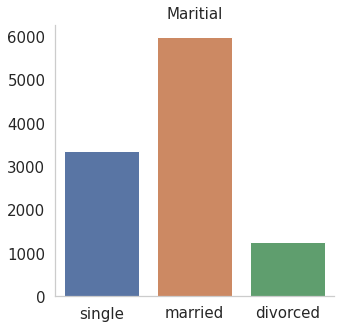

In [15]:
categorical_columns_countplot(5, 5, categorical_columns[1], "Maritial")

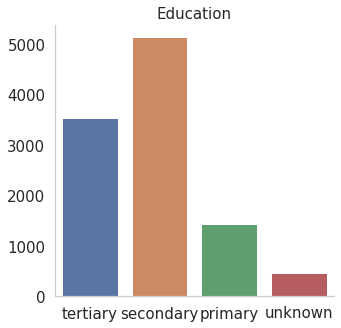

In [16]:
categorical_columns_countplot(5, 5, categorical_columns[2], "Education")

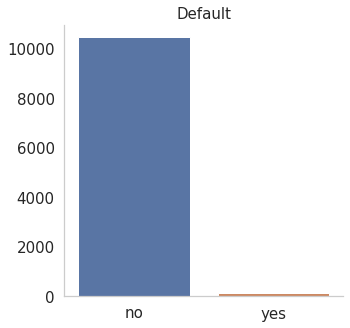

In [17]:
categorical_columns_countplot(5, 5, categorical_columns[3], "Default")

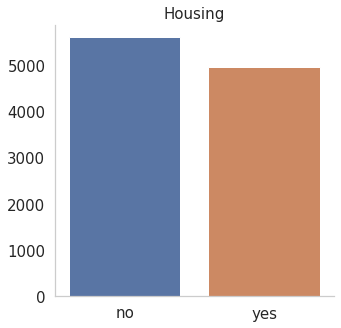

In [18]:
categorical_columns_countplot(5, 5, categorical_columns[4], "Housing")

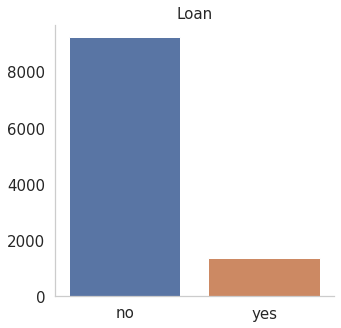

In [19]:
categorical_columns_countplot(5, 5, categorical_columns[5], "Loan")

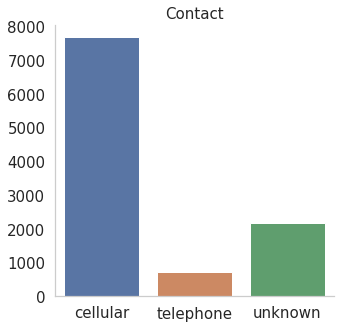

In [20]:
categorical_columns_countplot(5, 5, categorical_columns[6], "Contact")

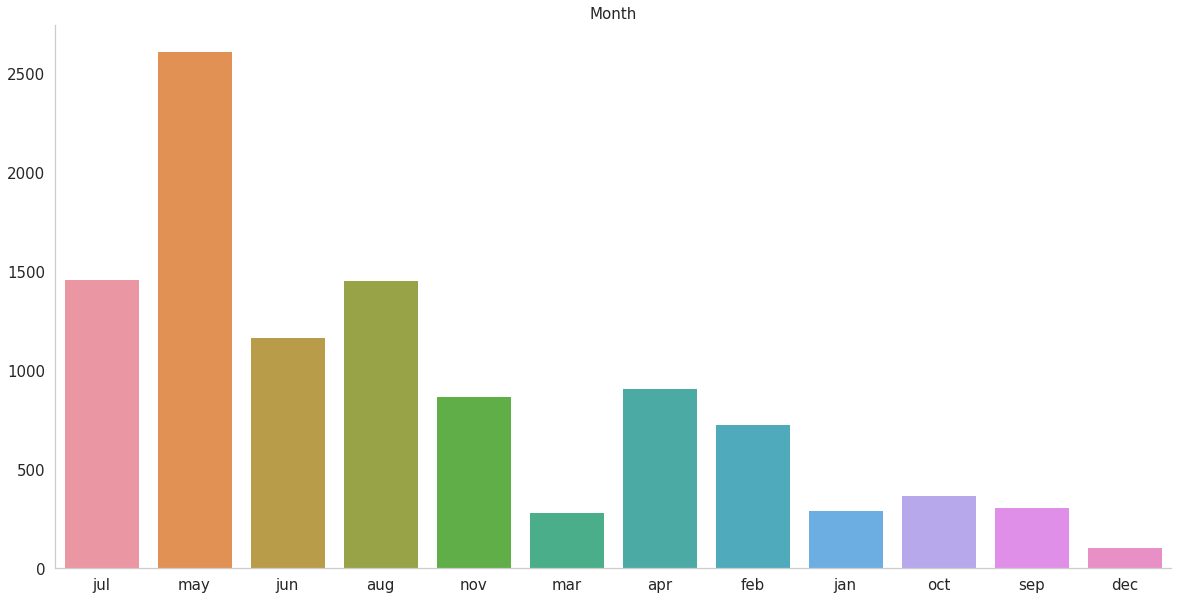

In [21]:
categorical_columns_countplot(20, 10, categorical_columns[7], "Month")

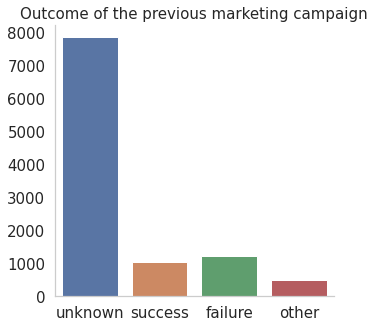

In [22]:
categorical_columns_countplot(5, 5, categorical_columns[8], "Outcome of the previous marketing campaign")

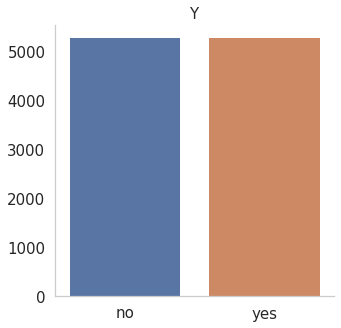

In [23]:
categorical_columns_countplot(5, 5, balanced_dataset["y"], "Y")

### Numerical Columns

In [24]:
# Function for drawing numerical columns. Need to pass dimension (size_x and size_y), column name, and title.
def numerical_columns_histplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    
    ax.hist(balanced_dataset[column])
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)

    sns.despine()

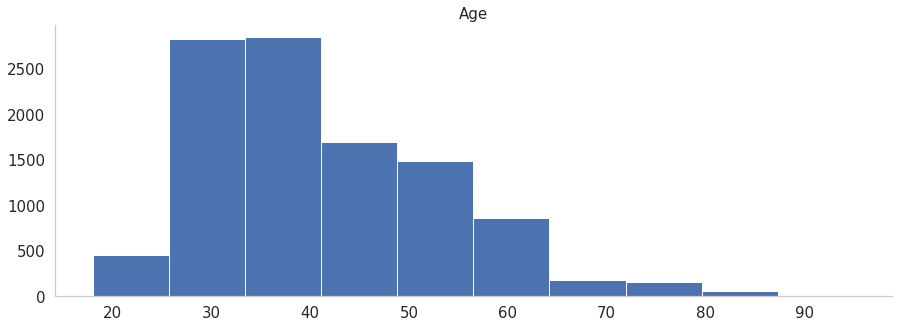

In [25]:
numerical_columns_histplot(15, 5, numerical_columns[0], "Age")

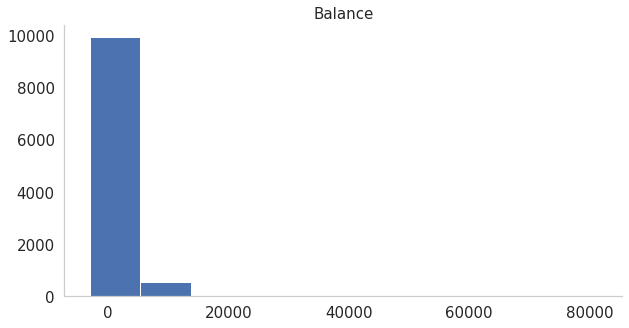

In [26]:
numerical_columns_histplot(10, 5, numerical_columns[1], "Balance")

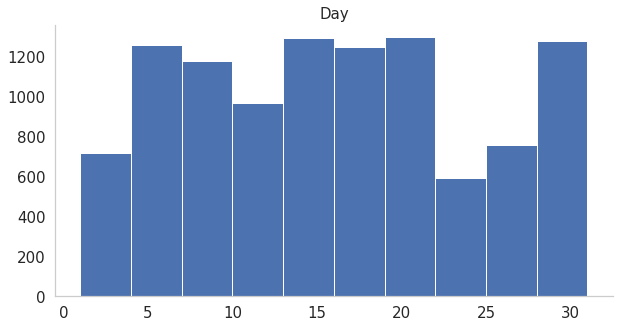

In [27]:
numerical_columns_histplot(10, 5, numerical_columns[2], "Day")

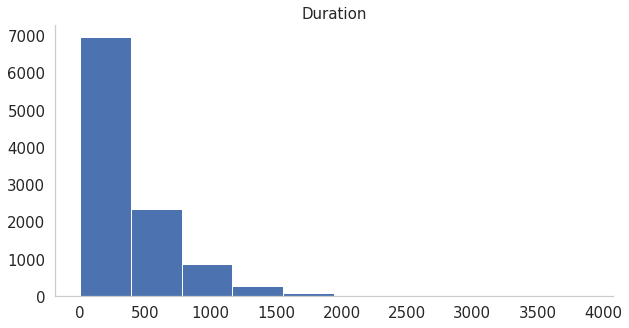

In [28]:
numerical_columns_histplot(10, 5, numerical_columns[3], "Duration")

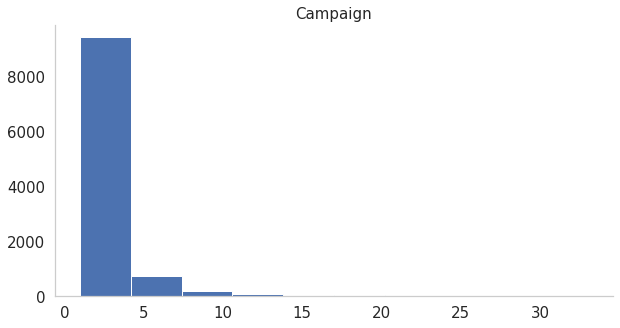

In [29]:
numerical_columns_histplot(10, 5, numerical_columns[4], "Campaign")

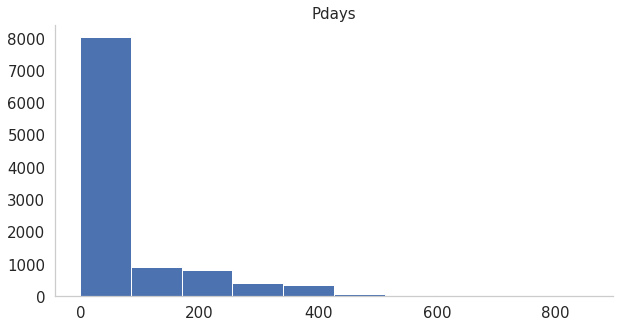

In [30]:
numerical_columns_histplot(10, 5, numerical_columns[5], "Pdays")

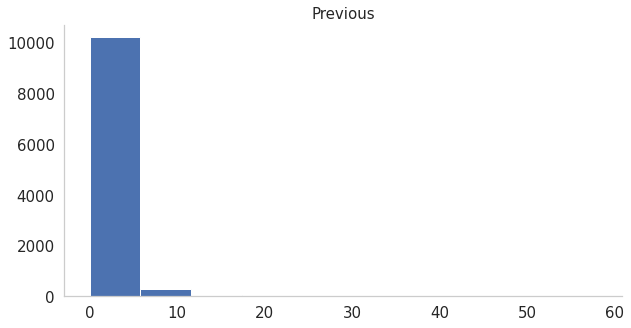

In [31]:
numerical_columns_histplot(10, 5, numerical_columns[6], "Previous")

### Looking for Possible Outliers

In [32]:
balanced_dataset[['balance', 'duration', 'campaign', 'previous', 'pdays']].describe()

,balance,duration,campaign,previous,pdays
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,1552.770372,380.467007,2.487805,0.844489,52.780866
std,3155.054809,350.023331,2.587724,2.297468,109.567566
min,-3058.000000,1.000000,1.000000,0.000000,-1.000000
25%,127.000000,144.250000,1.000000,0.000000,-1.000000
50%,563.000000,261.000000,2.000000,0.000000,-1.000000
75%,1739.750000,513.000000,3.000000,1.000000,63.000000
max,81204.000000,3881.000000,33.000000,58.000000,854.000000


In [33]:
len(balanced_dataset[balanced_dataset['previous'] > 10])

94

Since there is only 81 of 10.578 total values are above of 10, I'm dropping all values above 10.

In [34]:
index_names = balanced_dataset[balanced_dataset['previous'] > 10].index 
balanced_dataset.drop(index_names, inplace = True) 

In [35]:
len(balanced_dataset[balanced_dataset['previous'] > 25])

0

In [36]:
print(len(balanced_dataset[balanced_dataset['pdays'] > 100]))
print(len(balanced_dataset[balanced_dataset['pdays'] > 200]))
print(len(balanced_dataset[balanced_dataset['pdays'] > 300]))
print(len(balanced_dataset[balanced_dataset['pdays'] > 400]))
print(len(balanced_dataset[balanced_dataset['pdays'] == 999]))
print(len(balanced_dataset[balanced_dataset['pdays'] == -1]))

1963
960
597
124
0
7834


Also, dropping all values from pdays that are above 400.
In dataset description stays that 999 stands for "client wasn't previously contacted", but since that there are 0 values with 999, and 36.954 with -1, I guess that -1 stands for "client wasn't previously contacted" and that this is an error in description.

In [37]:
index_names = balanced_dataset[balanced_dataset['pdays'] > 400].index 
balanced_dataset.drop(index_names, inplace = True)

In [38]:
len(balanced_dataset[balanced_dataset['pdays'] > 400])

0

In [39]:
print(len(balanced_dataset[balanced_dataset['campaign'] > 10]))
print(len(balanced_dataset[balanced_dataset['campaign'] > 15]))
print(len(balanced_dataset[balanced_dataset['campaign'] > 20]))
print(len(balanced_dataset[balanced_dataset['campaign'] > 30]))

203
79
34
7


Dropping all Campaign values above 20.

In [40]:
index_names = balanced_dataset[balanced_dataset['campaign'] > 20].index 
balanced_dataset.drop(index_names, inplace = True)

In [41]:
len(balanced_dataset[balanced_dataset['campaign'] > 20])

0

In [42]:
print(len(balanced_dataset[balanced_dataset['duration'] > 1000]))
print(len(balanced_dataset[balanced_dataset['duration'] > 2000]))
print(len(balanced_dataset[balanced_dataset['duration'] > 3000]))

691
32
6


In [43]:
print(len(balanced_dataset[balanced_dataset['balance'] > 10000]))
print(len(balanced_dataset[balanced_dataset['balance'] > 20000]))
print(len(balanced_dataset[balanced_dataset['balance'] > 30000]))

223
50
12


### Comparing Dependent Variable with Independent variables

In [44]:
# Function for independent feature with dependent. Need to pass dimension (size_x and size_y), independent column name, and title.
def comparing_variables(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    sns.countplot(x = column, hue = 'y', data = balanced_dataset, palette = 'viridis')
    
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)
    
    sns.despine()

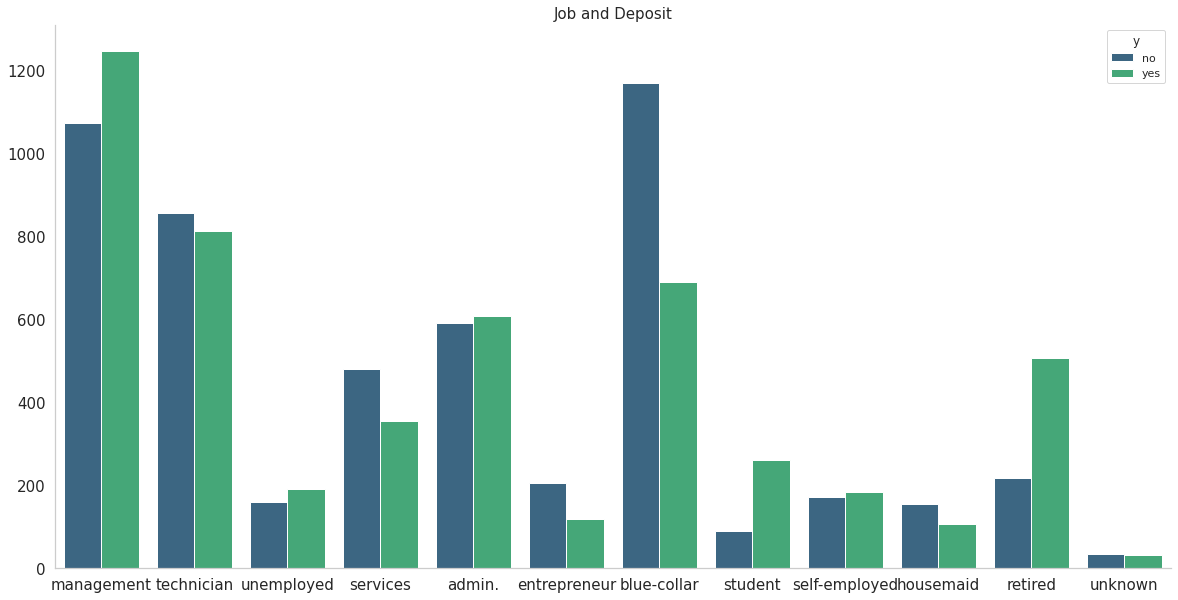

In [45]:
comparing_variables(20, 10, categorical_columns[0], "Job and Deposit")

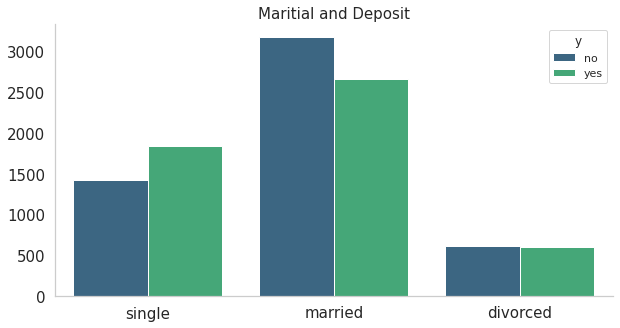

In [46]:
comparing_variables(10, 5, categorical_columns[1], "Maritial and Deposit")

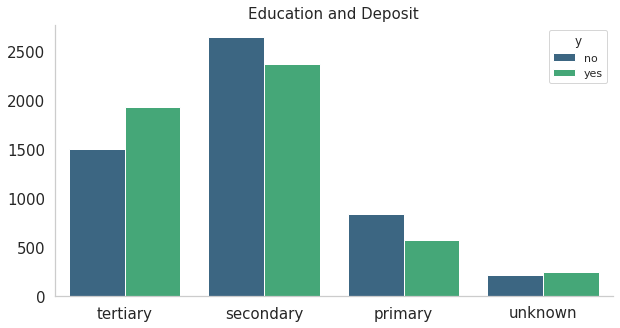

In [47]:
comparing_variables(10, 5, categorical_columns[2], "Education and Deposit")

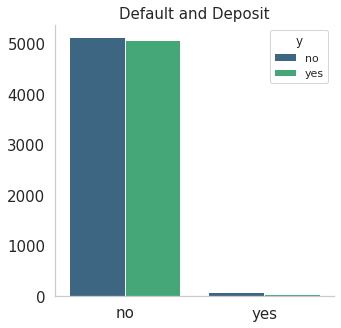

In [48]:
comparing_variables(5, 5, categorical_columns[3], "Default and Deposit")

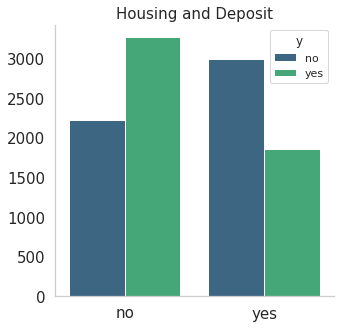

In [49]:
comparing_variables(5, 5, categorical_columns[4], "Housing and Deposit")

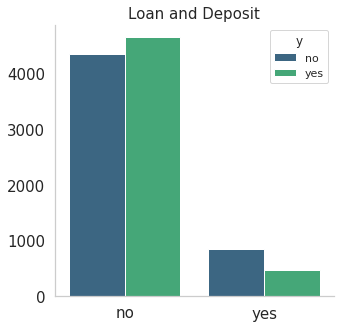

In [50]:
comparing_variables(5, 5, categorical_columns[5], "Loan and Deposit")

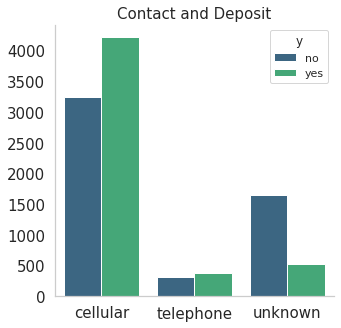

In [51]:
comparing_variables(5, 5, categorical_columns[6], "Contact and Deposit")

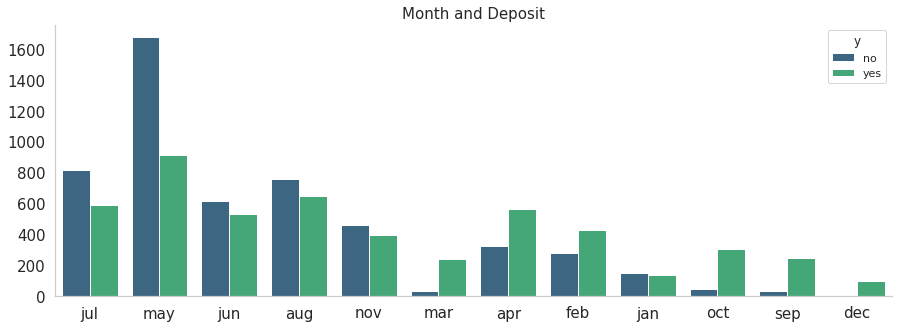

In [52]:
comparing_variables(15, 5, categorical_columns[7], "Month and Deposit")

In [53]:
len(balanced_dataset.age.unique())

74

In [54]:
# Creating age bins, and setting dummy values. 1 = 18-32, 2 = 33-48, 3 = 49-65, 4 = 65+. Bins are created according to quartiles.

bins = [0, 33, 49, 65, np.inf]
names = [1, 2, 3, 4]

balanced_dataset['age_range'] = pd.cut(balanced_dataset['age'], bins, labels = names)

balanced_dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
40429,40429,28,management,single,tertiary,no,492,no,no,cellular,2,jul,281,1,-1,0,unknown,no,1
17190,17190,27,technician,married,secondary,no,0,yes,no,cellular,28,jul,55,6,-1,0,unknown,no,1
15638,15638,35,technician,divorced,secondary,no,103,yes,no,cellular,21,jul,304,1,-1,0,unknown,no,2
35512,35512,31,unemployed,single,tertiary,no,140,yes,no,telephone,7,may,11,2,-1,0,unknown,no,1
9532,9532,45,services,married,secondary,no,191,no,yes,unknown,6,jun,136,2,-1,0,unknown,no,2


In [55]:
age_labels = ['18-32', '33-48', '49-65', '65+']

# Function for extracting data for creating the table for comparing Ages and Y/N deposits.
def getCount(yes_no, age_bin):
    extract = pd.DataFrame()
    extract = balanced_dataset.loc[(balanced_dataset.y == yes_no) & (balanced_dataset.age_range == age_bin)]
    return len(extract)

age_yes_no_0 = pd.DataFrame(data=[[getCount("no", 1), getCount("no", 2), getCount("no", 3), getCount("no", 4)]], 
                          columns=[age_labels[0], age_labels[1], age_labels[2], age_labels[3]])
age_yes_no_1 = pd.DataFrame(data=[[getCount("yes", 1), getCount("yes", 2), getCount("yes", 3), getCount("yes", 4)]], 
                          columns=[age_labels[0], age_labels[1], age_labels[2], age_labels[3]])
age_yes_no = age_yes_no_0.append(age_yes_no_1, ignore_index=True)
age_yes_no

,18-32,33-48,49-65,65+
0,1471,2588,1090,59
1,1730,2047,1028,313


In [56]:
age_no = age_yes_no_0.iloc[0]
age_yes = age_yes_no_1.iloc[0]

In [57]:
# Function for drawing plotbar. Need to pass data (deposit_no and deposit_yes) which are created in previous DataFrame, title, label names.

def plotbar(deposit_no, deposit_yes, title, labels):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, deposit_no, width, label='No')
    rects2 = ax.bar(x + width/2, deposit_yes, width, label='Yes')
    
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

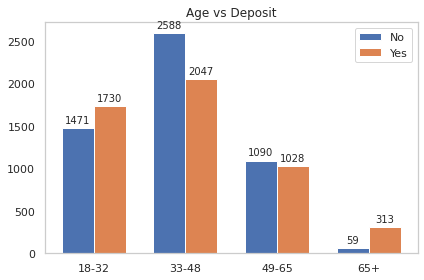

In [58]:
plotbar(age_no, age_yes, "Age vs Deposit", age_labels)

In [59]:
balance_labels = ["Range", "Yes", "No"]

# Extracting data for creating the table for comparing Balance and Y/N deposits

extract_1_y = pd.DataFrame()
extract_1_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.balance < 1000)]

extract_1_n = pd.DataFrame()
extract_1_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.balance < 1000)]

extract_1_2_y = pd.DataFrame()
extract_1_2_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.balance > 1000) & (balanced_dataset.balance < 2000)]

extract_1_2_n = pd.DataFrame()
extract_1_2_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.balance > 1000) & (balanced_dataset.balance < 2000)]

extract_2_5_y = pd.DataFrame()
extract_2_5_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.balance > 2000) & (balanced_dataset.balance < 5000)]

extract_2_5_n = pd.DataFrame()
extract_2_5_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.balance > 2000) & (balanced_dataset.balance < 5000)]

extract_5_y = pd.DataFrame()
extract_5_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.balance > 5000)]

extract_5_n = pd.DataFrame()
extract_5_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.balance > 5000)]


balance_1 = pd.DataFrame(data=[["< 1.000", len(extract_1_y), len(extract_1_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])

balance_1_2 = pd.DataFrame(data=[["1.000 - 2.000", len(extract_1_2_y), len(extract_1_2_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_1.append(balance_1_2, ignore_index=True)

balance_2_5 = pd.DataFrame(data=[["2.000 - 5.000", len(extract_2_5_y), len(extract_2_5_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_yes_no.append(balance_2_5, ignore_index=True)

balance_5 = pd.DataFrame(data=[["> 5.000", len(extract_5_y), len(extract_5_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_yes_no.append(balance_5, ignore_index=True)

balance_yes_no

,Range,Yes,No
0,< 1.000,2948,3592
1,1.000 - 2.000,804,693
2,2.000 - 5.000,935,610
3,> 5.000,426,313


In [60]:
duration_labels = ["Range", "Yes", "No"]

# Extracting data for creating the table for comparing Duration and Y/N deposits

extract_duration_300_y = pd.DataFrame()
extract_duration_300_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.duration >= 1) & (balanced_dataset.duration <= 300)]

extract_duration_300_n = pd.DataFrame()
extract_duration_300_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.duration >= 1) & (balanced_dataset.duration <= 300)]

extract_duration_600_y = pd.DataFrame()
extract_duration_600_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.duration > 300) & (balanced_dataset.duration <= 600)]

extract_duration_600_n = pd.DataFrame()
extract_duration_600_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.duration > 300) & (balanced_dataset.duration <= 600)]

extract_duration_1200_y = pd.DataFrame()
extract_duration_1200_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.duration > 600) & (balanced_dataset.duration <= 1200)]

extract_duration_1200_n = pd.DataFrame()
extract_duration_1200_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.duration > 600) & (balanced_dataset.duration <= 1200)]

extract_duration_1800_y = pd.DataFrame()
extract_duration_1800_y = balanced_dataset.loc[(balanced_dataset.y == "yes") & (balanced_dataset.duration > 1200) & (balanced_dataset.duration <= 1800)]

extract_duration_1800_n = pd.DataFrame()
extract_duration_1800_n = balanced_dataset.loc[(balanced_dataset.y == "no") & (balanced_dataset.duration > 1200) & (balanced_dataset.duration <= 1800)]

extract_duration_above_1800_y = pd.DataFrame()
extract_duration_above_1800_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 1800)]

extract_duration_above_1800_n = pd.DataFrame()
extract_duration_above_1800_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 1800)]


duration_300 = pd.DataFrame(data=[["< 300", len(extract_duration_300_y), len(extract_duration_300_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])

duration_600 = pd.DataFrame(data=[["300 - 600", len(extract_duration_600_y), len(extract_duration_600_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_300.append(duration_600, ignore_index=True)

duration_1200 = pd.DataFrame(data=[["600 - 1.200", len(extract_duration_1200_y), len(extract_duration_1200_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_1200, ignore_index=True)

duration_1800 = pd.DataFrame(data=[["1.200 - 1.800", len(extract_duration_1800_y), len(extract_duration_1800_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_1800, ignore_index=True)

duration_above_1800 = pd.DataFrame(data=[["> 1.800", len(extract_duration_above_1800_y), len(extract_duration_above_1800_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_above_1800, ignore_index=True)

duration_yes_no

,Range,Yes,No
0,< 300,1750,4030
1,300 - 600,1558,906
2,600 - 1.200,1468,242
3,1.200 - 1.800,288,28
4,> 1.800,55,52


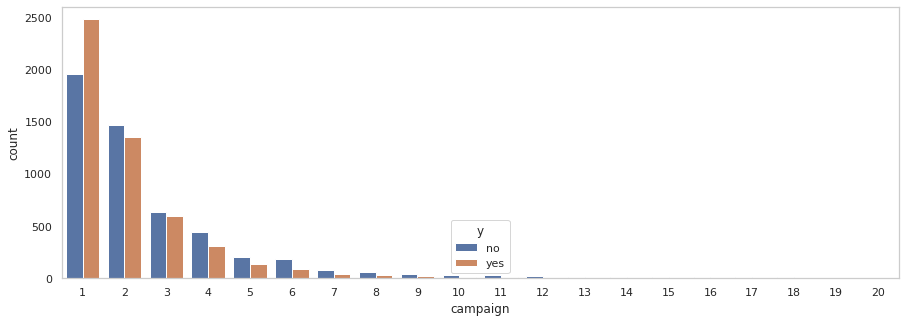

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x="campaign",hue="y",data=balanced_dataset)
plt.show()

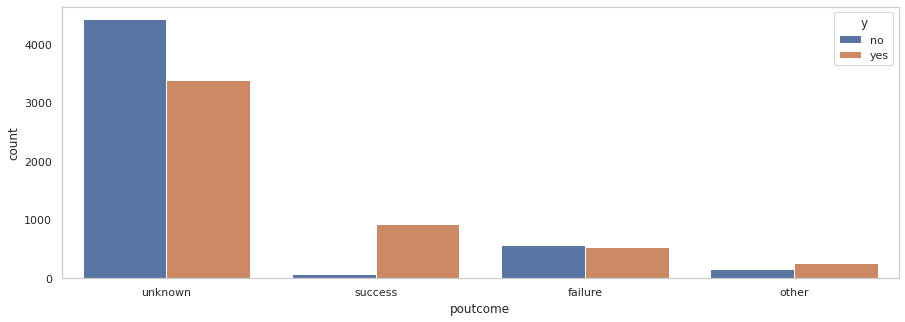

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x="poutcome",hue="y",data=balanced_dataset)
plt.show()

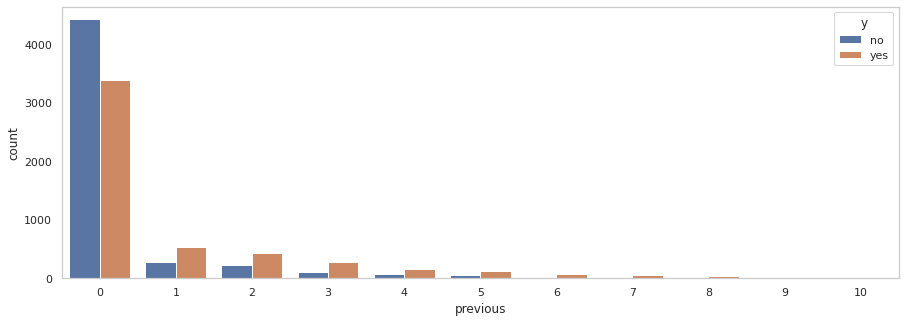

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(x="previous",hue="y",data=balanced_dataset)
plt.show()

### Comparision of Dependent Variables

In [64]:
balance_and_jobs = pd.DataFrame()

jobs = ['management', 'technician', 'blue-collar', 'entrepreneur', 'retired', 'unknown', 'student', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid' ]

for job in jobs:
  balance_and_jobs[job] = (balanced_dataset[balanced_dataset['job'] == job][['job','balance']].describe())['balance']

balance_and_jobs

,management,technician,blue-collar,entrepreneur,retired,unknown,student,admin.,services,self-employed,unemployed,housemaid
count,2321.000000,1670.000000,1860.000000,324.000000,725.000000,67.000000,353.000000,1200.000000,835.000000,355.000000,353.000000,263.000000
mean,1922.551917,1506.101198,1103.178495,1755.185185,2356.194483,2131.149254,1456.770538,1298.014167,1011.069461,1995.867606,1523.515581,1616.775665
std,3510.897264,2971.029241,2009.479906,3619.316149,5329.103804,3783.917267,2664.137996,2335.029562,1710.437548,4979.827931,3142.377580,2849.455849
min,-2712.000000,-1944.000000,-2604.000000,-886.000000,-1206.000000,0.000000,-322.000000,-930.000000,-839.000000,-3058.000000,-872.000000,-156.000000
25%,194.000000,117.000000,77.750000,35.500000,364.000000,253.500000,149.000000,106.000000,54.500000,152.500000,201.000000,92.000000
50%,697.000000,510.000000,429.000000,391.000000,1077.000000,942.000000,502.000000,469.000000,405.000000,663.000000,705.000000,745.000000
75%,2222.000000,1676.500000,1258.250000,2025.250000,2734.000000,2206.000000,1608.000000,1489.750000,1177.000000,2015.000000,1625.000000,1988.500000
max,39098.000000,45248.000000,24277.000000,27624.000000,81204.000000,19268.000000,23878.000000,25741.000000,12839.000000,52587.000000,44134.000000,26965.000000


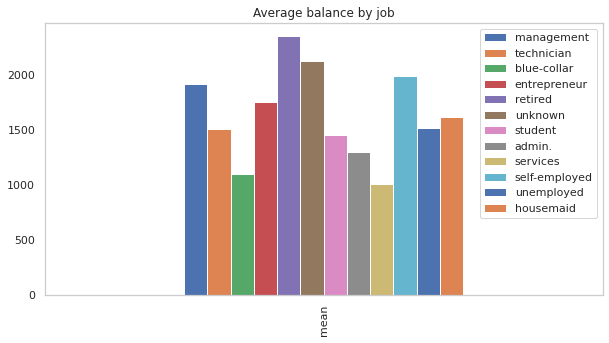

In [65]:
balance_and_jobs.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']).plot(kind = 'bar', figsize = (10, 5), title = 'Average balance by job')

In [66]:
balance_and_marital = pd.DataFrame()
balance_and_marital['Married'] = (balanced_dataset[balanced_dataset['marital'] == 'married'][['marital','balance']].describe())['balance']
balance_and_marital['Single'] = (balanced_dataset[balanced_dataset['marital'] == 'single'][['marital','balance']].describe())['balance']
balance_and_marital['Divorced'] = (balanced_dataset[balanced_dataset['marital'] == 'divorced'][['marital','balance']].describe())['balance']

balance_and_marital

,Married,Single,Divorced
count,5843.000000,3262.000000,1221.000000
mean,1617.747219,1463.573881,1482.410319
std,3216.768699,2867.921134,3699.787303
min,-3058.000000,-2604.000000,-1455.000000
25%,135.000000,134.000000,51.000000
50%,611.000000,533.000000,451.000000
75%,1852.500000,1577.250000,1580.000000
max,81204.000000,45248.000000,52587.000000


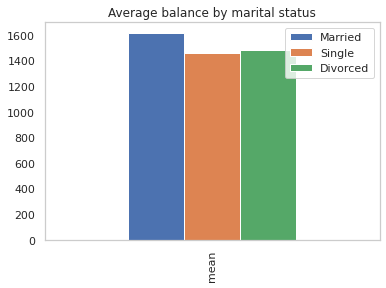

In [67]:
balance_and_marital.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']).plot.bar(title = 'Average balance by marital status')

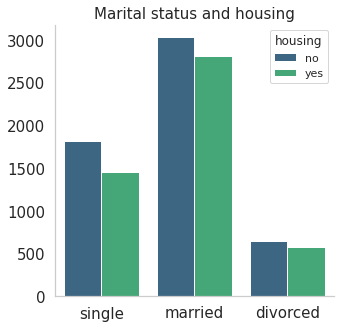

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'marital', hue = 'housing', data = balanced_dataset, palette = 'viridis')

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Marital status and housing", fontsize = 15)
ax.tick_params(labelsize = 15)

sns.despine()

Text(0.5, 1.0, 'Balance by Education')

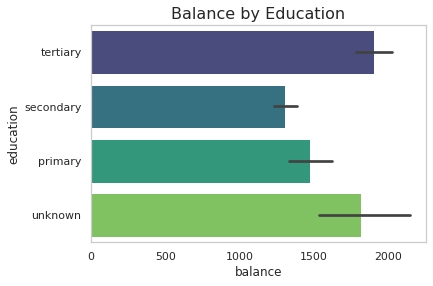

In [69]:
sns.barplot(x="balance", y="education", data=balanced_dataset, palette = 'viridis')

plt.title('Balance by Education', fontsize=16)

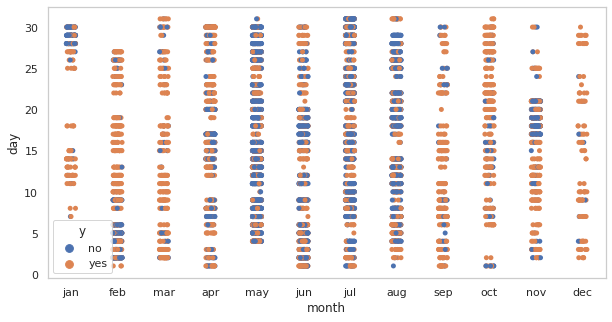

In [70]:
plt.figure(figsize=(10,5))
sns.stripplot(x="month", y="day", hue="y", data = balanced_dataset, order=("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"))
plt.show()

## Data Cleaning

In [71]:
columns_with_yes_no = ['default', 'housing', 'loan', 'y']

for column in columns_with_yes_no:
    balanced_dataset[column].replace(['no', 'yes'], [0, 1], inplace=True)
    
balanced_dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
40429,40429,28,management,single,tertiary,0,492,0,0,cellular,2,jul,281,1,-1,0,unknown,0,1
17190,17190,27,technician,married,secondary,0,0,1,0,cellular,28,jul,55,6,-1,0,unknown,0,1
15638,15638,35,technician,divorced,secondary,0,103,1,0,cellular,21,jul,304,1,-1,0,unknown,0,2
35512,35512,31,unemployed,single,tertiary,0,140,1,0,telephone,7,may,11,2,-1,0,unknown,0,1
9532,9532,45,services,married,secondary,0,191,0,1,unknown,6,jun,136,2,-1,0,unknown,0,2


In [72]:
columns_with_categories = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in columns_with_categories:
  balanced_dataset[column] = le.fit_transform(balanced_dataset[column]) 

cleaned_dataset = balanced_dataset.copy()
cleaned_dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
40429,40429,28,4,2,2,0,492,0,0,0,2,5,281,1,-1,0,3,0,1
17190,17190,27,9,1,1,0,0,1,0,0,28,5,55,6,-1,0,3,0,1
15638,15638,35,9,0,1,0,103,1,0,0,21,5,304,1,-1,0,3,0,2
35512,35512,31,10,2,2,0,140,1,0,1,7,8,11,2,-1,0,3,0,1
9532,9532,45,7,1,1,0,191,0,1,2,6,6,136,2,-1,0,3,0,2


Dropping: contact, day, duration, campaign, previous, pdays.

In [73]:
cleaned_dataset = cleaned_dataset[['age_range', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'month', 'poutcome', 'y']]

In [74]:
cleaned_dataset.head()

,age_range,job,marital,education,default,balance,housing,loan,month,poutcome,y
40429,1,4,2,2,0,492,0,0,5,3,0
17190,1,9,1,1,0,0,1,0,5,3,0
15638,2,9,0,1,0,103,1,0,5,3,0
35512,1,10,2,2,0,140,1,0,8,3,0
9532,2,7,1,1,0,191,0,1,6,3,0


## Correlation Between Features

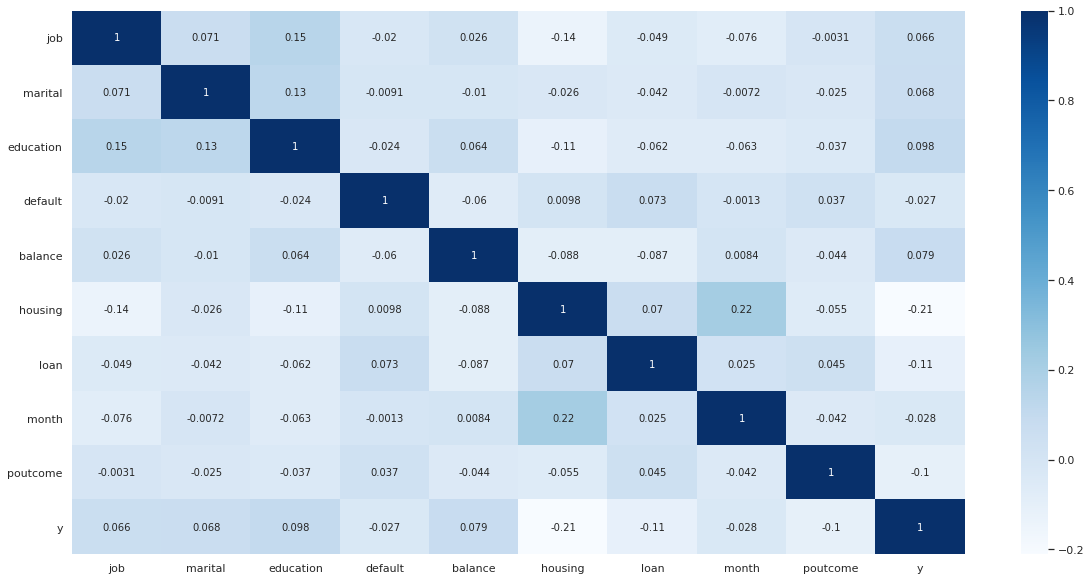

In [75]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(cleaned_dataset.corr(), cmap='Blues', annot = True)

## Preparation for training and testing

#### Defining dependent and independent variables

In [76]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

#### Splitting the dataset into the Training and Test set

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

#### 1. Logistic Classification

In [79]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred = log_classifier.predict(X_test)

In [81]:
cm_log = confusion_matrix(y_test, y_pred)
print(cm_log)

accuracy_score_log_reg = accuracy_score(y_test, y_pred)
accuracy_score_log_reg = "{:.2f} %".format(accuracy_score_log_reg.mean()*100)
precision_score_log_reg = precision_score(y_test, y_pred)
precision_score_log_reg = "{:.2f} %".format(precision_score_log_reg.mean()*100)
recall_score_log_reg = recall_score(y_test, y_pred)
recall_score_log_reg = "{:.2f} %".format(recall_score_log_reg.mean()*100)

[[756 549]
 [473 804]]


In [84]:
accuracies = cross_val_score(estimator = log_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_log_reg = "{:.2f} %".format(accuracies.mean()*100)

In [85]:
results_df = pd.DataFrame(data=[["Linear Classification", val_accuracy_score_log_reg, accuracy_score_log_reg, precision_score_log_reg, recall_score_log_reg]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %


#### 2. KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
y_pred = knn_classifier.predict(X_test)

In [88]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

accuracy_score_knn = accuracy_score(y_test, y_pred)
accuracy_score_knn = "{:.2f} %".format(accuracy_score_knn.mean()*100)
precision_score_knn = precision_score(y_test, y_pred)
precision_score_knn = "{:.2f} %".format(precision_score_knn.mean()*100)
recall_score_knn = recall_score(y_test, y_pred)
recall_score_knn = "{:.2f} %".format(recall_score_knn.mean()*100)

[[859 446]
 [567 710]]


In [89]:
accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_knn = "{:.2f} %".format(accuracies.mean()*100)

In [90]:
results_df_2 = pd.DataFrame(data=[["KNN", val_accuracy_score_knn, accuracy_score_knn, precision_score_knn, recall_score_knn]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %


#### 3. SVM

In [91]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [92]:
y_pred = svm_classifier.predict(X_test)

In [93]:
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)

accuracy_score_svm = accuracy_score(y_test, y_pred)
accuracy_score_svm = "{:.2f} %".format(accuracy_score_svm.mean()*100)
precision_score_svm = precision_score(y_test, y_pred)
precision_score_svm = "{:.2f} %".format(precision_score_svm.mean()*100)
recall_score_svm = recall_score(y_test, y_pred)
recall_score_svm = "{:.2f} %".format(recall_score_svm.mean()*100)

[[758 547]
 [491 786]]


In [94]:
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_svm = "{:.2f} %".format(accuracies.mean()*100)

In [95]:
results_df_3 = pd.DataFrame(data=[["SVM", val_accuracy_score_svm, accuracy_score_svm, precision_score_svm, recall_score_svm]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %
2,SVM,60.85 %,59.80 %,58.96 %,61.55 %


#### 4. Kernel SVM

In [96]:
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [97]:
y_pred = kernel_svm_classifier.predict(X_test)

In [98]:
cm_kernel_svm = confusion_matrix(y_test, y_pred)
print(cm_kernel_svm)

accuracy_score_kernel_svm = accuracy_score(y_test, y_pred)
accuracy_score_kernel_svm = "{:.2f} %".format(accuracy_score_kernel_svm.mean()*100)
precision_score_kernel_svm = precision_score(y_test, y_pred)
precision_score_kernel_svm = "{:.2f} %".format(precision_score_kernel_svm.mean()*100)
recall_score_kernel_svm = recall_score(y_test, y_pred)
recall_score_kernel_svm = "{:.2f} %".format(recall_score_kernel_svm.mean()*100)

[[1057  248]
 [ 624  653]]


In [99]:
accuracies = cross_val_score(estimator = kernel_svm_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_kernel_svm = "{:.2f} %".format(accuracies.mean()*100)

In [100]:
results_df_4 = pd.DataFrame(data=[["Kernel SVM", val_accuracy_score_kernel_svm, accuracy_score_kernel_svm, precision_score_kernel_svm, recall_score_kernel_svm]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %
2,SVM,60.85 %,59.80 %,58.96 %,61.55 %
3,Kernel SVM,66.13 %,66.23 %,72.48 %,51.14 %


#### 5. Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [102]:
y_pred = nb_classifier.predict(X_test)

In [103]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

accuracy_score_nb = accuracy_score(y_test, y_pred)
accuracy_score_nb = "{:.2f} %".format(accuracy_score_nb.mean()*100)
precision_score_nb = precision_score(y_test, y_pred)
precision_score_nb = "{:.2f} %".format(precision_score_nb.mean()*100)
recall_score_nb = recall_score(y_test, y_pred)
recall_score_nb = "{:.2f} %".format(recall_score_nb.mean()*100)

[[651 654]
 [392 885]]


In [104]:
accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_nb = "{:.2f} %".format(accuracies.mean()*100)

In [105]:
results_df_5 = pd.DataFrame(data=[["Naive Bayes", val_accuracy_score_nb, accuracy_score_nb, precision_score_nb, recall_score_nb]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %
2,SVM,60.85 %,59.80 %,58.96 %,61.55 %
3,Kernel SVM,66.13 %,66.23 %,72.48 %,51.14 %
4,Naive Bayes,62.10 %,59.49 %,57.50 %,69.30 %


#### 6. Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [107]:
y_pred = decision_tree_classifier.predict(X_test)

In [108]:
cm_decision_tree = confusion_matrix(y_test, y_pred)
print(cm_decision_tree)

accuracy_score_decision_tree = accuracy_score(y_test, y_pred)
accuracy_score_decision_tree = "{:.2f} %".format(accuracy_score_decision_tree.mean()*100)
precision_score_decision_tree = precision_score(y_test, y_pred)
precision_score_decision_tree = "{:.2f} %".format(precision_score_decision_tree.mean()*100)
recall_score_decision_tree = recall_score(y_test, y_pred)
recall_score_decision_tree = "{:.2f} %".format(recall_score_decision_tree.mean()*100)

[[821 484]
 [528 749]]


In [109]:
accuracies = cross_val_score(estimator = decision_tree_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_decision_tree = "{:.2f} %".format(accuracies.mean()*100)

In [110]:
results_df_6 = pd.DataFrame(data=[["Decision Tree", val_accuracy_score_decision_tree, accuracy_score_decision_tree, precision_score_decision_tree, recall_score_decision_tree]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %
2,SVM,60.85 %,59.80 %,58.96 %,61.55 %
3,Kernel SVM,66.13 %,66.23 %,72.48 %,51.14 %
4,Naive Bayes,62.10 %,59.49 %,57.50 %,69.30 %
5,Decision Tree,60.64 %,60.81 %,60.75 %,58.65 %


#### 7. Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [112]:
y_pred = random_forest_classifier.predict(X_test)

In [113]:
cm_random_forest = confusion_matrix(y_test, y_pred)
print(cm_random_forest)

accuracy_score_random_forest = accuracy_score(y_test, y_pred)
accuracy_score_random_forest = "{:.2f} %".format(accuracy_score_random_forest.mean()*100)
precision_score_random_forest = precision_score(y_test, y_pred)
precision_score_random_forest = "{:.2f} %".format(precision_score_random_forest.mean()*100)
recall_score_random_forest = recall_score(y_test, y_pred)
recall_score_random_forest = "{:.2f} %".format(recall_score_random_forest.mean()*100)

[[953 352]
 [551 726]]


In [114]:
accuracies = cross_val_score(estimator = random_forest_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_random_forest = "{:.2f} %".format(accuracies.mean()*100)

In [115]:
results_df_7 = pd.DataFrame(data=[["Random Forest", val_accuracy_score_random_forest, accuracy_score_random_forest, precision_score_random_forest, recall_score_random_forest]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_7, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %
2,SVM,60.85 %,59.80 %,58.96 %,61.55 %
3,Kernel SVM,66.13 %,66.23 %,72.48 %,51.14 %
4,Naive Bayes,62.10 %,59.49 %,57.50 %,69.30 %
5,Decision Tree,60.64 %,60.81 %,60.75 %,58.65 %
6,Random Forest,65.46 %,65.03 %,67.35 %,56.85 %


#### 8. XGBoost

In [116]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [117]:
y_pred = xgb_classifier.predict(X_test)

In [118]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)

accuracy_score_xgb = accuracy_score(y_test, y_pred)
accuracy_score_xgb = "{:.2f} %".format(accuracy_score_xgb.mean()*100)
precision_score_xgb = precision_score(y_test, y_pred)
precision_score_xgb = "{:.2f} %".format(precision_score_xgb.mean()*100)
recall_score_xgb = recall_score(y_test, y_pred)
recall_score_xgb = "{:.2f} %".format(recall_score_xgb.mean()*100)

[[1087  218]
 [ 572  705]]


In [119]:
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb = "{:.2f} %".format(accuracies.mean()*100)

In [120]:
results_df_8 = pd.DataFrame(data=[["XGBoost", val_accuracy_score_xgb, accuracy_score_xgb, precision_score_xgb, recall_score_xgb]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_8, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %
2,SVM,60.85 %,59.80 %,58.96 %,61.55 %
3,Kernel SVM,66.13 %,66.23 %,72.48 %,51.14 %
4,Naive Bayes,62.10 %,59.49 %,57.50 %,69.30 %
5,Decision Tree,60.64 %,60.81 %,60.75 %,58.65 %
6,Random Forest,65.46 %,65.03 %,67.35 %,56.85 %
7,XGBoost,69.37 %,69.40 %,76.38 %,55.21 %


### 9. ANN

In [121]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [122]:
ann.fit(X_train, y_train, epochs = 50)

Epoch 1/50
242/242 [==============================] - 0s 914us/step - loss: 0.6717 - accuracy: 0.5932
Epoch 2/50
242/242 [==============================] - 0s 912us/step - loss: 0.6489 - accuracy: 0.6280
Epoch 3/50
242/242 [==============================] - 0s 870us/step - loss: 0.6410 - accuracy: 0.6337
Epoch 4/50
242/242 [==============================] - 0s 894us/step - loss: 0.6363 - accuracy: 0.6414
Epoch 5/50
242/242 [==============================] - 0s 887us/step - loss: 0.6313 - accuracy: 0.6442
Epoch 6/50
242/242 [==============================] - 0s 887us/step - loss: 0.6273 - accuracy: 0.6503
Epoch 7/50
242/242 [==============================] - 0s 871us/step - loss: 0.6235 - accuracy: 0.6546
Epoch 8/50
242/242 [==============================] - 0s 891us/step - loss: 0.6199 - accuracy: 0.6564
Epoch 9/50
242/242 [==============================] - 0s 883us/step - loss: 0.6166 - accuracy: 0.6643
Epoch 10/50
242/242 [==============================] - 0s 901us/step - loss: 0.613

In [123]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [124]:
cm_ann = confusion_matrix(y_test, y_pred)
print(cm_ann)

accuracy_score_ann = accuracy_score(y_test, y_pred)
accuracy_score_ann = "{:.2f} %".format(accuracy_score_ann.mean()*100)
precision_score_ann = precision_score(y_test, y_pred)
precision_score_ann = "{:.2f} %".format(precision_score_ann.mean()*100)
recall_score_ann = recall_score(y_test, y_pred)
recall_score_ann = "{:.2f} %".format(recall_score_ann.mean()*100)

[[1063  242]
 [ 617  660]]


In [125]:
results_df_9 = pd.DataFrame(data=[["ANN", "-", accuracy_score_ann, precision_score_ann, recall_score_ann]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_9, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,61.98 %,60.42 %,59.42 %,62.96 %
1,KNN,63.37 %,60.77 %,61.42 %,55.60 %
2,SVM,60.85 %,59.80 %,58.96 %,61.55 %
3,Kernel SVM,66.13 %,66.23 %,72.48 %,51.14 %
4,Naive Bayes,62.10 %,59.49 %,57.50 %,69.30 %
5,Decision Tree,60.64 %,60.81 %,60.75 %,58.65 %
6,Random Forest,65.46 %,65.03 %,67.35 %,56.85 %
7,XGBoost,69.37 %,69.40 %,76.38 %,55.21 %
8,ANN,-,66.73 %,73.17 %,51.68 %


## ANN - Hyperparameter Tuning

In [126]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([6, 16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )


def train_test_model(hparams):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(10, activation="sigmoid"),
  ])
    model.compile(optimizer=hparams[HP_OPTIMIZER], loss='sparse_categorical_crossentropy', metrics=['accuracy'],)

    model.fit(X_train, y_train, epochs=50)
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy

In [127]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [128]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 6, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
242/242 [==============================] - 0s 917us/step - loss: 2.0678 - accuracy: 0.3919
Epoch 2/50
242/242 [==============================] - 0s 915us/step - loss: 1.0377 - accuracy: 0.5564
Epoch 3/50
242/242 [==============================] - 0s 923us/step - loss: 0.7426 - accuracy: 0.5571
Epoch 4/50
242/242 [==============================] - 0s 936us/step - loss: 0.7100 - accuracy: 0.5446
Epoch 5/50
242/242 [==============================] - 0s 899us/step - loss: 0.7023 - accuracy: 0.5465
Epoch 6/50
242/242 [==============================] - 0s 902us/step - loss: 0.6984 - accuracy: 0.5365
Epoch 7/50
242/242 [==============================] - 0s 914us/step - loss: 0.6969 - accuracy: 0.5402
Epoch 8/50
242/242 [==============================] - 0s 964us/step - loss: 0.6977 - accuracy: 0.5393
Epoch 9/50
242/242 [==============================] - 0s 928us/step - loss: 0.6960 - accuracy: 0.5312
Ep

In [ ]:
%load_ext tensorboard

%tensorboard --logdir logs/hparam_tuning